In [9]:
import numpy as np
import rasterio.plot
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from burst_translator import BurstMetadata

swath_tif = 'S1A_IW_SLC__1SDV_20200616T022252_20200616T022319_033036_03D3A3_5D11.SAFE/measurement/s1a-iw1-slc-vh-20200616t022253-20200616t022318-033036-03d3a3-001.tiff'
swath_ann = 'S1A_IW_SLC__1SDV_20200616T022252_20200616T022319_033036_03D3A3_5D11.SAFE/annotation/s1a-iw1-slc-vh-20200616t022253-20200616t022318-033036-03d3a3-001.xml'

In [18]:
burst = BurstMetadata(swath_tif, swath_ann, 0)

x1, x2, y1, y2 = burst.first_valid_sample, burst.last_valid_sample, burst.first_valid_line, burst.last_valid_line
isce_rectangle = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='Red')

In [13]:
with rasterio.open(swath_tif) as swath:
    swath_data = swath.read()
magnitude = np.abs(swath_data)

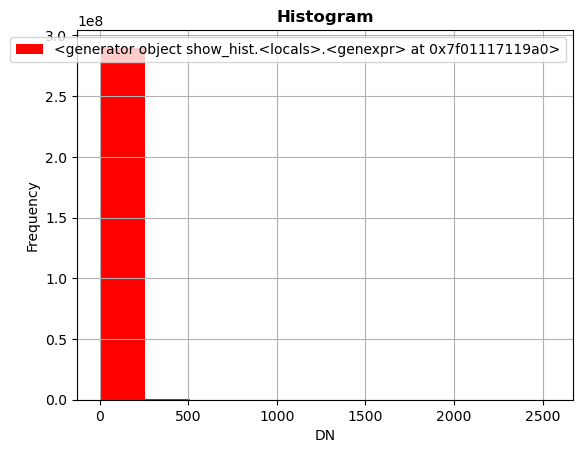

In [1]:
rasterio.plot.show_hist(magnitude, histtype='stepfilled')

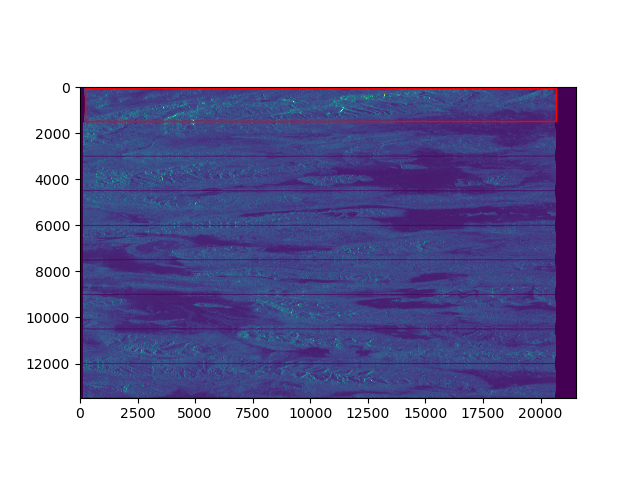

In [19]:
%matplotlib widget
fig, ax = plt.subplots(1, 1)
rasterio.plot.show(magnitude, ax=ax, vmin=0, vmax=250, cmap='viridis')
ax.add_patch(isce_rectangle)